## INF2178 Assignment2
## Yunfan Liu
## #1010006459

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm
%pip install bioinfokit
from bioinfokit.analys import stat

Note: you may need to restart the kernel to use updated packages.


In [2]:
data = pd.read_excel("/Users/yunfanliu/Desktop/INF2178_A2_data.xlsx")#read the data with currect path
data.head()

,_id,LOC_ID,LOC_NAME,AUSPICE,ADDRESS,PCODE,ward,bldg_type,BLDGNAME,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,1,1013,Lakeshore Community Child Care Centre,Non Profit Agency,101 SEVENTH ST,M8V 3B5,3,Public Elementary School,Seventh Street Public School,0,20,32,52,60,164,Y,Y
1,2,1014,Alternative Primary School Parent Group,Non Profit Agency,1100 SPADINA RD,M5N 2M6,8,Public Elementary School,North Preparatory Public School,0,0,12,26,45,83,Y,Y
2,3,1015,Cardinal Leger Child Care Centre (Scarborough),Non Profit Agency,600 MORRISH RD,M1C 4Y1,25,Catholic Elementary School,Cardinal Leger Catholic School,0,10,16,26,50,102,Y,Y
3,4,1016,George Brown - Richmond Adelaide Childcare Centre,Non Profit Agency,130 ADELAIDE ST W,M5H 3P5,10,Other,NaN,10,15,40,0,0,65,Y,Y
4,5,1017,Woodland Nursery School (Warden Woods Communit...,Non Profit Agency,1 FIRVALLEY CRT,M1L 1N8,20,High Rise Apartment,NaN,0,10,16,0,0,26,Y,Y


In [3]:
data.shape #check the shape of raw data

(1063, 17)

In [4]:
data =  data.drop(['_id', 'LOC_ID','LOC_NAME','ADDRESS','PCODE','bldg_type','BLDGNAME'], axis=1)
data.head()

,AUSPICE,ward,IGSPACE,TGSPACE,PGSPACE,KGSPACE,SGSPACE,TOTSPACE,subsidy,cwelcc_flag
0,Non Profit Agency,3,0,20,32,52,60,164,Y,Y
1,Non Profit Agency,8,0,0,12,26,45,83,Y,Y
2,Non Profit Agency,25,0,10,16,26,50,102,Y,Y
3,Non Profit Agency,10,10,15,40,0,0,65,Y,Y
4,Non Profit Agency,20,0,10,16,0,0,26,Y,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1063 entries, 0 to 1062
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   AUSPICE      1063 non-null   object
 1   ward         1063 non-null   int64 
 2   IGSPACE      1063 non-null   int64 
 3   TGSPACE      1063 non-null   int64 
 4   PGSPACE      1063 non-null   int64 
 5   KGSPACE      1063 non-null   int64 
 6   SGSPACE      1063 non-null   int64 
 7   TOTSPACE     1063 non-null   int64 
 8   subsidy      1063 non-null   object
 9   cwelcc_flag  1063 non-null   object
dtypes: int64(7), object(3)
memory usage: 83.2+ KB


Based on the statistical summary of the data

- The dataset has a total of 1063 entries with 10 features .
- Seven features are recognized as integer types (int64) and four features are recognized as object types
- There are no significant missing values as each feature has 1063 non-null values.

# Create New Continuous Variable

In [6]:
# reshape the data dataframe suitable for statsmodels package
df_melt = pd.melt(data.reset_index(), id_vars=['index'], value_vars=['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE'])

# replace column names
df_melt.columns = ['index', 'age_stage_treatments', 'space_value']
df_melt.head()

,index,age_stage_treatments,space_value
0,0,IGSPACE,0
1,1,IGSPACE,0
2,2,IGSPACE,0
3,3,IGSPACE,10
4,4,IGSPACE,0


# ANOVA

## EDA

/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 93.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 85.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 82.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 86.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yunfanliu/anaconda3/lib/python3.11/site-packa

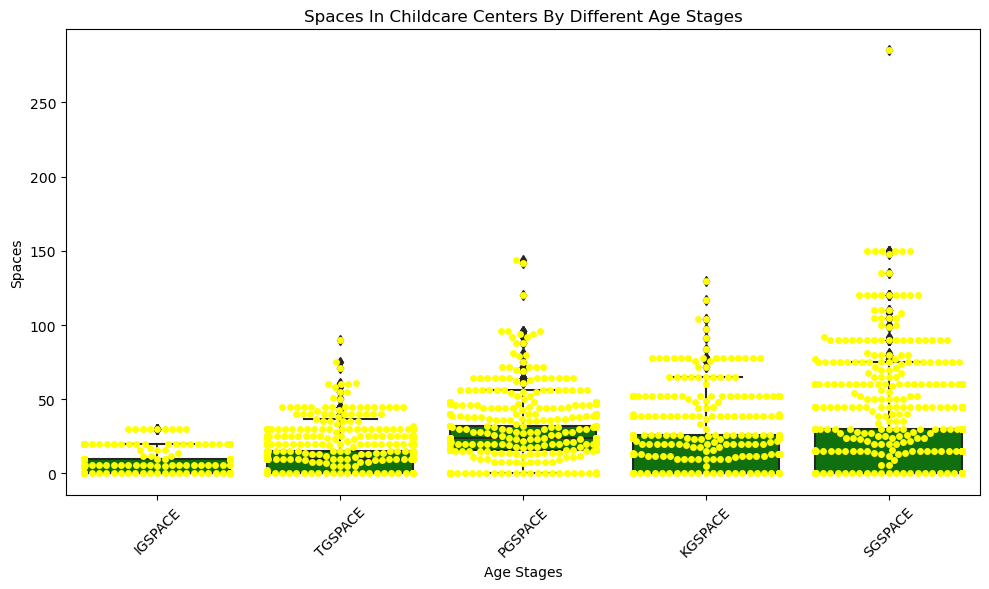

In [7]:
# generate a boxplot to see the data distribution by treatments. 
# Using boxplot, we can easily detect the differences between different treatments

plt.figure(figsize=(10, 6))
sns.boxplot(x='age_stage_treatments', y='space_value', data=df_melt,color='green')
sns.swarmplot(x="age_stage_treatments", y="space_value", data=df_melt,color = 'yellow')

plt.title('Spaces In Childcare Centers By Different Age Stages')
plt.ylabel('Spaces')
plt.xlabel('Age Stages')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

The boxplot reflects varying degrees of variability in the distribution of space sizes across different age stages. For instance, the interquartile range for IGSPACE is shorter, indicating that the distribution of space sizes for IGSPACE is relatively concentrated. Additionally, there are multiple outliers in each age stage, suggesting that some childcare centers have unusually high space sizes for these age groups. This could be attributed to special service requirements, funding sources, or operational models, representing a societal response; therefore, we consider retaining these outliers for the time being.

## One-way ANOVA

Research Question 1: To explore whether the effect of different child care age stages on space size significant

H0: There is no significant difference in space size among different child care age stages.

H1: At least one age stage exhibits statistically significant differences in space size .

In [8]:
# Ordinary Least Squares (OLS) model
model = ols('space_value ~ C(age_stage_treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)  
anova_table
# ANOVA table
res = stat()
res.anova_stat(df=df_melt, res_var='space_value', anova_model='space_value ~ C(age_stage_treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(age_stage_treatments),4.0,2.821233e+05,70530.816839,188.190768,4.517383e-151
Residual,5310.0,1.990101e+06,374.783617,NaN,NaN


The ANOVA results show 4 degrees of freedom as 5 categories in age_stages with an F-statistic of 188.190768 and a corresponding p-value: 4.517383e-151<0.05, which suggests that we have sufficient evidence to reject the null hypothesis that there is no significant difference in space size among different child care age stages.

In [9]:
#post hoc test using Scheffe's test or Tukey's HSD
res = stat()
res.tukey_hsd(df=df_melt, res_var='space_value', xfac_var='age_stage_treatments', anova_model='space_value ~ C(age_stage_treatments)')
res.tukey_summary

/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is depr

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,IGSPACE,TGSPACE,7.703669,5.412308,9.995029,12.974001,0.001000
1,IGSPACE,PGSPACE,20.362183,18.070822,22.653543,34.292619,0.001000
2,IGSPACE,KGSPACE,10.361242,8.069881,12.652602,17.449707,0.001000
3,IGSPACE,SGSPACE,17.764817,15.473456,20.056177,29.918310,0.001000
4,TGSPACE,PGSPACE,12.658514,10.367153,14.949874,21.318618,0.001000
5,TGSPACE,KGSPACE,2.657573,0.366213,4.948933,4.475706,0.013527
6,TGSPACE,SGSPACE,10.061148,7.769787,12.352508,16.944309,0.001000
7,PGSPACE,KGSPACE,10.000941,7.709580,12.292301,16.842912,0.001000
8,PGSPACE,SGSPACE,2.597366,0.306006,4.888726,4.374309,0.017028
9,KGSPACE,SGSPACE,7.403575,5.112214,9.694935,12.468603,0.001000


Differences in the sapca size among all age stages were significant (p-value < 0.05), and were weaker for TGSPACE and KGSPACE; PGSPACE and SGSPACE compared to the other stages. The result implies that almost every age stage is significantly different from at least one other age stage in terms of the number of childcare spaces at different ages.

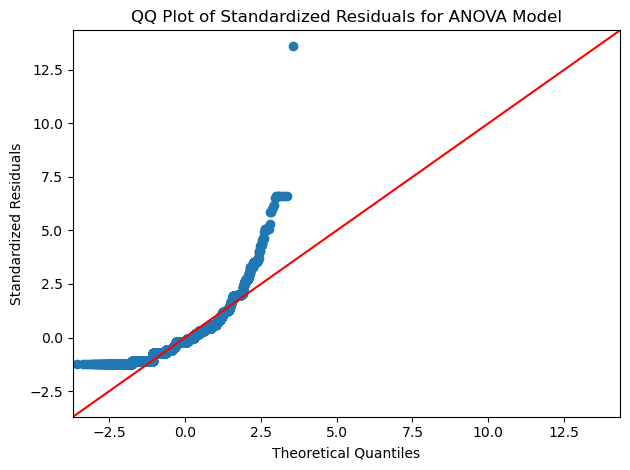

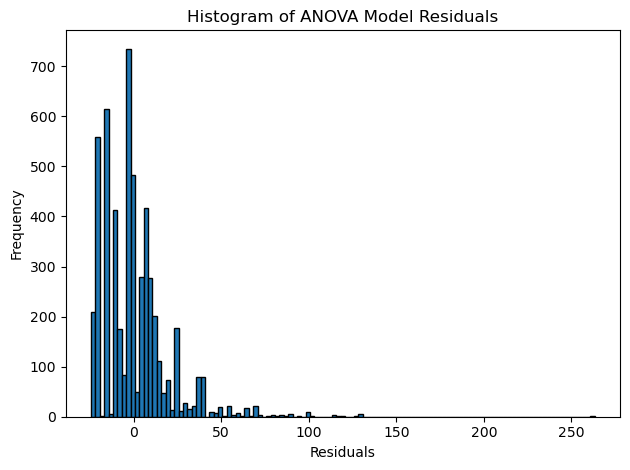

In [10]:
#checking model diagnostics
# assumption 1 : res.anova_std_residuals are standardized residuals obtained from ANOVA 
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.title("QQ Plot of Standardized Residuals for ANOVA Model")
plt.tight_layout() 
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.title("Histogram of ANOVA Model Residuals")
plt.tight_layout() 
plt.show()

The Quantile-Quantile Plot shows that most of the data points follow this line in the center portion, but there are deviations at the ends, especially in the upper right corner of the graph. This indicates that there are some extreme values of the data away from the center that are much larger than would be expected from a normal distribution.

The histogram shows that the distribution of the residuals of the data is skewed, which also suggests that the assumption of normality of the data may have been violated.

Next, we will decide whether to reject the assumption of a normal distribution of residuals by using the Shapiro-Wilk test：

H0:residuals are normally distributed

H1:residuals are not normally distributed

In [11]:
#assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(model.resid)
print(w,pvalue)

#convert p-value:0.0 to <0.001 
if pvalue < 0.001:
    print(f"Shapiro-Wilk test statistic: {w}, p-value: <0.001")
else:
    print(f"Shapiro-Wilk test statistic: {w}, p-value: {pvalue:.3f}")

0.8427016139030457 0.0
Shapiro-Wilk test statistic: 0.8427016139030457, p-value: <0.001


/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


p-value<0.001, implying that we have enough evidence to reject the null hypothesis that the residuals are normally distributed

Since our data do not currently conform to a normal distribution, we performed homogeneity test of variance using the Levene test, which is less dependent on the normal distribution of the data.

H0:the variances are consistent across groups.

H1:the variances are inconsistent across groups.

In [12]:
#assumption 2: variances are homogenous: Levene's test when the sample is not normally distributed
res.levene(df=df_melt, res_var='space_value', xfac_var='age_stage_treatments')
print(res.levene_summary)

#convert p-value:0.0 to <0.001 
res.levene_summary.loc[2, 'Value'] = '<0.001'
res.levene_summary

                 Parameter     Value
0      Test statistics (W)  142.6228
1  Degrees of freedom (Df)    4.0000
2                  p value    0.0000


,Parameter,Value
0,Test statistics (W),142.6228
1,Degrees of freedom (Df),4.0
2,p value,<0.001


The p-value < 0.001, implying that we have enough evidence to reject the null hypothesis that the variances are consistent across groups.

As we can observe, our sample does not meet the assumptions required for ANOVA. Considering this, I would like to try the  non-parametric test to re-validate the initial ANOVA findings that there is no significant difference in space size among different child care age stages, also as Non-parametric tests do not assume normal distribution of the data and homogeneity of variance.

Assumption:whether the effect of different child care age stages on space size significant

H0: There is no significant difference in space size among different child care age stages.

H1: At least one age stage exhibits statistically significant differences in space size .

In [13]:
# non-parametric test
h, p_value = stats.kruskal(*[group['space_value'].values for name, group in df_melt.groupby('age_stage_treatments')])
print(h, p_value)

818.6634260274693 6.960346391052689e-176


The p-value <0.05 which provides evidence to reject the null hypothesis that there is no significant difference in space size among different child care age stages. This finding is in agreement with the initial ANOVA results. Despite the ANOVA's assumptions not being satisfied, the results of the non-parametric tests lend support to the same conclusion.

## Two-way ANOVA

- Main Effect Hypothesis 1: Whether there is a significant difference in space sizes across different AUSPICE categories.
    - H0: There is no significant difference in space sizes between different AUSPICE categories.
    - H1: There is a significant difference in space sizes for at least one of AUSPICE categories.
- Main Effect Hypothesis 2: Whether there is a significant difference in space sizes across different age stages.
    - H0: There is no significant difference in space sizes between different age stages.
    - H1: There is a significant difference in space sizes for at least one of the ages.
- Interaction Effect Hypothesis: Whether there is a significant interaction effect between AUSPICE and age_stage_treatments.
    - H0: There is no significant interaction effect on space sizes between AUSPICE and age_stage_treatments.
    - H1: There is a significant interaction effect on space sizes between AUSPICE and age_stage_treatments.

In [14]:
#add another category variable
df_melt2 = pd.melt(data, id_vars=['AUSPICE'], value_vars=['IGSPACE', 'TGSPACE', 'PGSPACE', 'KGSPACE', 'SGSPACE'])
df_melt2.columns = ['AUSPICE', 'age_stage_treatments', 'space_value']
df_melt2

,AUSPICE,age_stage_treatments,space_value
0,Non Profit Agency,IGSPACE,0
1,Non Profit Agency,IGSPACE,0
2,Non Profit Agency,IGSPACE,0
3,Non Profit Agency,IGSPACE,10
4,Non Profit Agency,IGSPACE,0
...,...,...,...
5310,Non Profit Agency,SGSPACE,60
5311,Non Profit Agency,SGSPACE,0
5312,Non Profit Agency,SGSPACE,0
5313,Non Profit Agency,SGSPACE,30


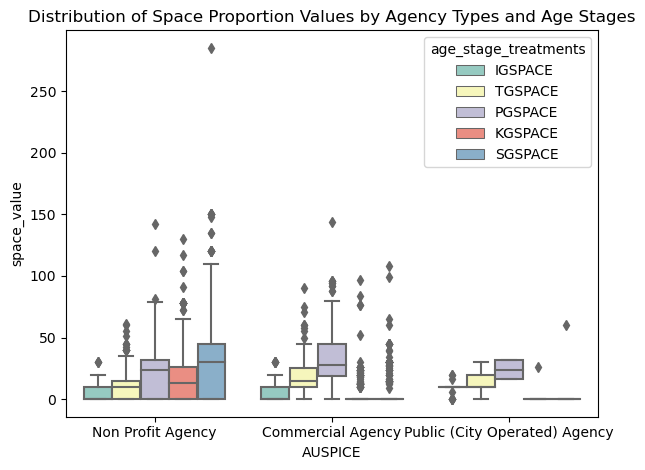

In [15]:
# generate a boxplot to see the data distribution by treatments.
sns.boxplot(x="AUSPICE", y="space_value", hue="age_stage_treatments",data=df_melt2, palette="Set3")
plt.title("Distribution of Space Proportion Values by Agency Types and Age Stages")
plt.tight_layout() 

The differences in the distribution of space size values among different age stage treatment groups within various AUSPICE categories may indicate the presence of potential interaction effects. For example, the differences between age stages were greater within nonprofit organizations.

In [16]:
# Result of Two Way ANOVA
model=ols('space_value ~ C(AUSPICE) + C(age_stage_treatments) + C(AUSPICE):C(age_stage_treatments)', data=df_melt2).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AUSPICE),1.922242e+04,2.0,29.104369,2.685589e-13
C(age_stage_treatments),2.821233e+05,4.0,213.579208,3.726614e-170
C(AUSPICE):C(age_stage_treatments),2.206458e+05,8.0,83.519093,9.972931e-131
Residual,1.750233e+06,5300.0,NaN,NaN


In [17]:
# Another way to get the same result of Two Way ANOVA
res = stat()
res.anova_stat(df=df_melt2, res_var='space_value', anova_model='space_value ~ C(AUSPICE) + C(age_stage_treatments) + C(AUSPICE):C(age_stage_treatments)')
dd = res.anova_summary
dd

,df,sum_sq,mean_sq,F,PR(>F)
C(AUSPICE),2.0,1.922242e+04,9611.211429,29.104369,2.685589e-13
C(age_stage_treatments),4.0,2.821233e+05,70530.816839,213.579208,3.726614e-170
C(AUSPICE):C(age_stage_treatments),8.0,2.206458e+05,27580.726915,83.519093,9.972931e-131
Residual,5300.0,1.750233e+06,330.232598,NaN,NaN



- C(AUSPICE): p-value<0.05, indicating that we have sufficient evidence to reject the null hypothesis that there is no significant difference in space sizes between different AUSPICE categories..

- C(age_stage_treatments): p-value<0.05, indicating that we have sufficient evidence to reject the null hypothesis that there is no significant difference in space sizes between different age stages.

- C(AUSPICE):C(age_stage_treatments) indicates the interaction effect between AUSPICE and age stages. The p-value <0.05 suggests that there is an interaction between the two categorical variables, meaning that the effect of space size in different age stages within various AUSPICE categories is interdependent.

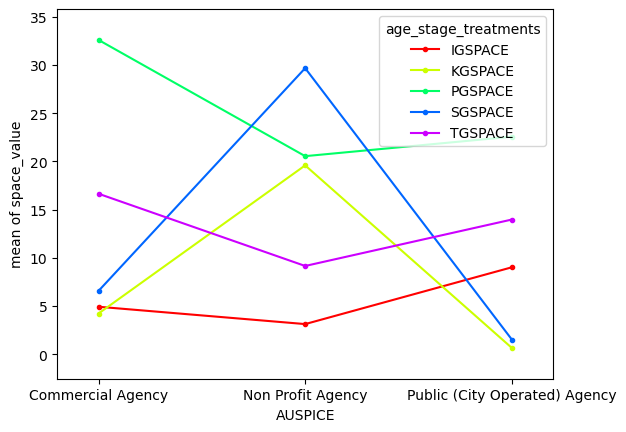

In [18]:
#interaction plot
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=df_melt2['AUSPICE'],trace=df_melt2['age_stage_treatments'],response=df_melt2['space_value'])
plt.show()

This interaction plot shows that different AUSPICE categories behave significantly differently in space across age stages. For example, for TGSPACE, nonprofit organizations have a smaller average space size than commercial organizations, while public organizations show a relatively larger value.

In [19]:
# Tukey HSD
res.tukey_hsd(df=df_melt2, res_var='space_value',xfac_var='AUSPICE',anova_model='space_value ~ C(AUSPICE) + C(age_stage_treatments) + C(AUSPICE):C(age_stage_treatments)')
res.tukey_summary

/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is depr

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Non Profit Agency,Commercial Agency,3.423883,2.140456,4.707311,8.844824,0.001000
1,Non Profit Agency,Public (City Operated) Agency,6.866922,3.732600,10.001244,7.263738,0.001000
2,Commercial Agency,Public (City Operated) Agency,3.443039,0.212180,6.673898,3.533178,0.033472


The results of the post-hoc test showed all p-values < 0.05 for comparisons between different AUSPICE categories, suggesting that AUSPICE type is an important factor influencing the size of the space, further supporting that we have sufficient evidence to reject the null hypothesis that there is no significant difference in space sizes between different AUSPICE categories.

In [20]:
# Tukey HSD
res.tukey_hsd(df=df_melt2,res_var='space_value',xfac_var='age_stage_treatments',anova_model='space_value ~ C(AUSPICE) + C(age_stage_treatments) + C(AUSPICE):C(age_stage_treatments)')
res.tukey_summary

/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is depr

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,IGSPACE,TGSPACE,7.703669,5.552803,9.854535,13.821471,0.001000
1,IGSPACE,PGSPACE,20.362183,18.211316,22.513049,36.532634,0.001000
2,IGSPACE,KGSPACE,10.361242,8.210376,12.512108,18.589533,0.001000
3,IGSPACE,SGSPACE,17.764817,15.613951,19.915683,31.872592,0.001000
4,TGSPACE,PGSPACE,12.658514,10.507648,14.809380,22.711163,0.001000
5,TGSPACE,KGSPACE,2.657573,0.506707,4.808439,4.768062,0.006750
6,TGSPACE,SGSPACE,10.061148,7.910282,12.212014,18.051121,0.001000
7,PGSPACE,KGSPACE,10.000941,7.850075,12.151807,17.943102,0.001000
8,PGSPACE,SGSPACE,2.597366,0.446500,4.748232,4.660042,0.008773
9,KGSPACE,SGSPACE,7.403575,5.252709,9.554441,13.283060,0.001000


The results of the post hoc test showed all p-values < 0.05 for comparisons between different age stages, suggesting that age stage is an important factor influencing the size of the space, further supporting that we have sufficient evidence to reject the null hypothesis that there is no significant difference in space sizes between different age stages..

In [21]:
# Tukey HSD
res.tukey_hsd(df=df_melt2,res_var='space_value',xfac_var=['AUSPICE','age_stage_treatments'], anova_model='space_value ~ C(AUSPICE) + C(age_stage_treatments) + C(AUSPICE):C(age_stage_treatments)')
res.tukey_summary.head()

/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (df[xfac_var[1]] == ele2)].mean().loc[res_var]
/Users/yunfanliu/anaconda3/lib/python3.11/site-packages/bioinfokit/analys.py:388: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, i

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Non Profit Agency, IGSPACE)","(Non Profit Agency, TGSPACE)",6.024182,2.735427,9.312937,8.789533,0.001
1,"(Non Profit Agency, IGSPACE)","(Non Profit Agency, PGSPACE)",17.408250,14.119495,20.697006,25.399362,0.001
2,"(Non Profit Agency, IGSPACE)","(Non Profit Agency, KGSPACE)",16.452347,13.163592,19.741102,24.004660,0.001
3,"(Non Profit Agency, IGSPACE)","(Non Profit Agency, SGSPACE)",26.529161,23.240405,29.817916,38.707151,0.001
4,"(Non Profit Agency, IGSPACE)","(Commercial Agency, IGSPACE)",1.796599,-2.356899,5.950098,2.075566,0.900


The results show significant differences in space dimensions at different ages in different types of organizations, but there are still cases where the results of the effect of the type of AUSPICE may be inconsistent at different ages, such as the space of IGSPACE in nonprofit agency with the space of IGSPACE in commercial agency,p-value= 0.900 > 0.05, which means that we have evidence in support of the null hypothesis.